<span style="font-size: 14pt; font-weight: bold;"> 1. Importing Data </span>

In [1]:
import pandas as pd
dataset = pd.read_csv("Dataset.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
dataset.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

<span style="font-size: 14pt; font-weight: bold;"> 2. Data Cleaning </span>

**Checking for null values**

In [3]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No missing values detected**

<span style="font-size: 14pt; font-weight: bold;"> 3. Data Analysis </span>

In [4]:
dataset = dataset.drop(['Id'], axis=1)

**Checking for classes of Iris species**

In [5]:
classes = dataset['Species'].unique()
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
variables = dataset.drop(['Species'], axis=1).columns
variables

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [8]:
dataset[variables].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<span style="font-size: 14pt; font-weight: bold;"> 4. Data Visualisation </span>

In [9]:
sepal_len_mean = dataset.groupby('Species')['SepalLengthCm'].mean()
sepal_len_mean

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64

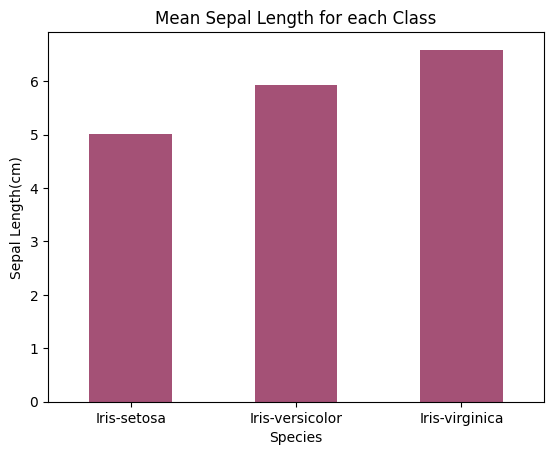

In [10]:
import matplotlib.pyplot as plt
sepal_len_mean.plot(kind='bar', color='#a45176')
plt.xticks(rotation=0)# Adjust the rotation angle as needed
plt.ylabel('Sepal Length(cm)')
plt.title('Mean Sepal Length for each Class')
plt.show()

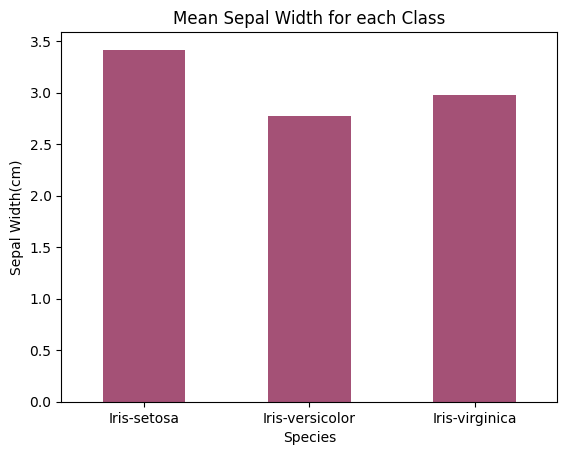

In [11]:
sepal_width_mean = dataset.groupby('Species')['SepalWidthCm'].mean()
sepal_width_mean.plot(kind='bar', color='#a45176')
plt.xticks(rotation=0)# Adjust the rotation angle as needed
plt.ylabel('Sepal Width(cm)')
plt.title('Mean Sepal Width for each Class')
plt.show()

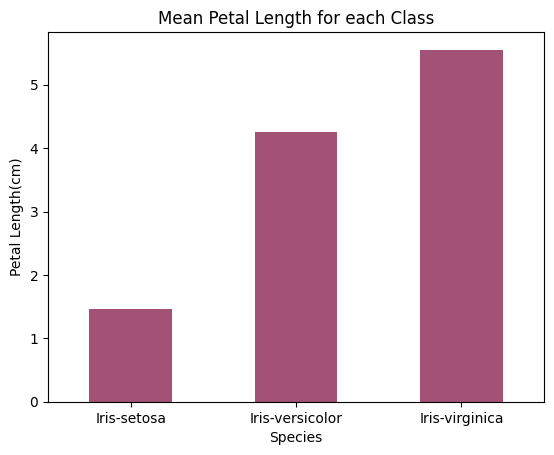

In [12]:
petal_len_mean = dataset.groupby('Species')['PetalLengthCm'].mean()
petal_len_mean.plot(kind='bar', color='#a45176')
plt.xticks(rotation=0)# Adjust the rotation angle as needed
plt.ylabel('Petal Length(cm)')
plt.title('Mean Petal Length for each Class')
plt.show()

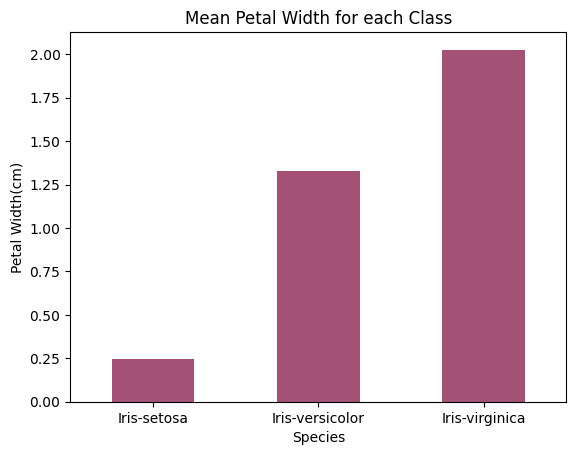

In [13]:
petal_width_mean = dataset.groupby('Species')['PetalWidthCm'].mean()
petal_width_mean.plot(kind='bar', color='#a45176')
plt.xticks(rotation=0)# Adjust the rotation angle as needed
plt.ylabel('Petal Width(cm)')
plt.title('Mean Petal Width for each Class')
plt.show()

**Distribution of Variables through Histograms**

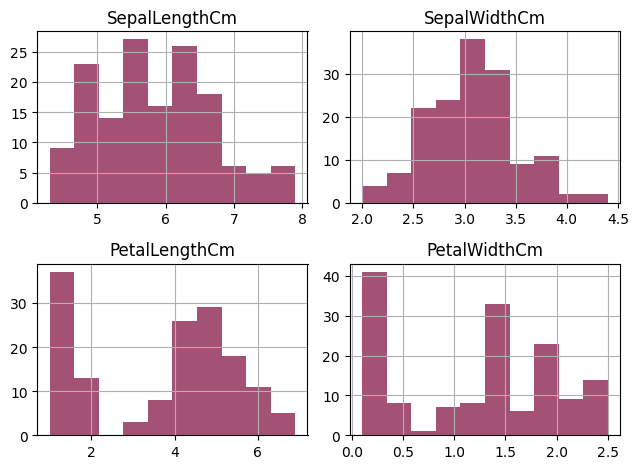

In [14]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    col = dataset.iloc[:, i]
    col.hist(color='#a45176')
    plt.title(variables[i])
    plt.subplots_adjust()
plt.tight_layout()

**Distribution of Varibales in different classes through BoxPlots**

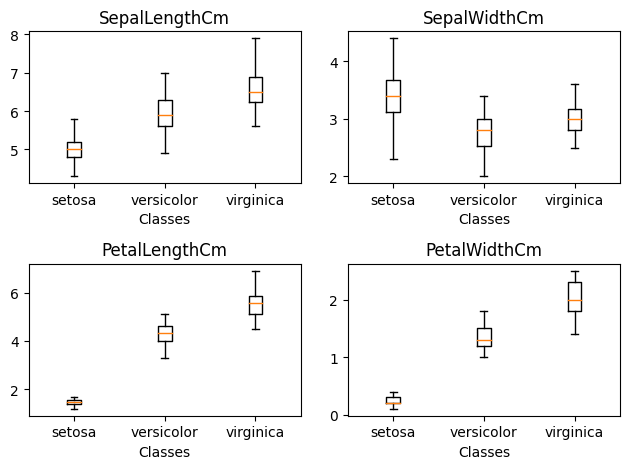

In [35]:
for j in range(4):
    plt.subplot(2, 2, j+1)
    for i in range(3):
        class_data = dataset[dataset['Species'] == classes[i]][variables[j]]
        plt.boxplot(class_data, positions=[i], labels=[classes[i].split('-')[1]], showfliers=False)
        plt.xlabel('Classes')
    plt.title(variables[j]) 
    plt.subplots_adjust()
plt.tight_layout()